In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
# create  Data
l = [11,10,12,14,12,15,14,15,13,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

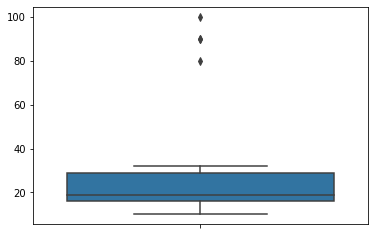

In [ ]:
sns.boxplot(y=l)

In [ ]:
# Using Z score

def find_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i- mean )/std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers
    

In [ ]:
# calling z score function for outlier detection
find_outliers(l)

[102, 107, 108]

In [68]:
# Using IQR ( this technique is usefull with skeweed data )
# Function to see the outliers from diven data
def iqr_outlier(l):
    outlier = []
    l = sorted(l)
    q1,q3 = np.percentile(l,[25,75])
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    upper_fence = q1+(1.5*iqr)

    for i in l:
        if (i > upper_fence) | (i < lower_fence):
            outlier.append(i)
    return outlier


In [69]:
iqr_outlier(l)

[17, 19, 102, 107, 108]

In [54]:
df= pd.read_csv('/content/pima-diabetic.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
df['diabetes'] = df['diabetes'].map({True:1,False:0})

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [55]:
df['bmi'] = df['bmi'].replace(0,df['bmi'].mean())
df['glucose_conc'] = df['glucose_conc'].replace(0,df['glucose_conc'].mean())
df['diastolic_bp'] = df['diastolic_bp'].replace(0,df['diastolic_bp'].mean())
df['thickness'] = df['thickness'].replace(0,df['thickness'].mean())
df['insulin'] = df['insulin'].replace(0,df['insulin'].mean())
df['skin'] = df['skin'].replace(0,df['skin'].mean())

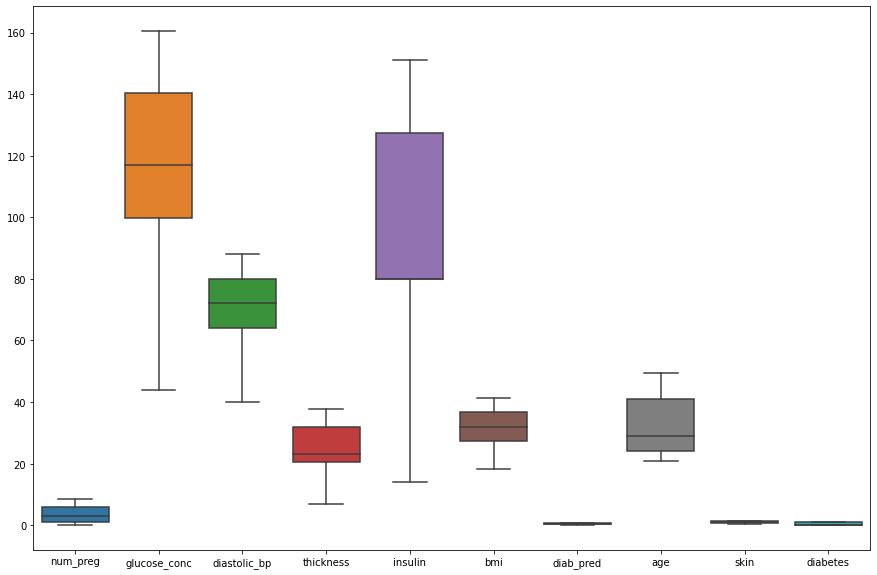

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df)

In [ ]:
def diagnostic_plot(df,column):
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    sns.distplot(df[column],bins=30)
    plt.title('Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title('boxplot')

    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


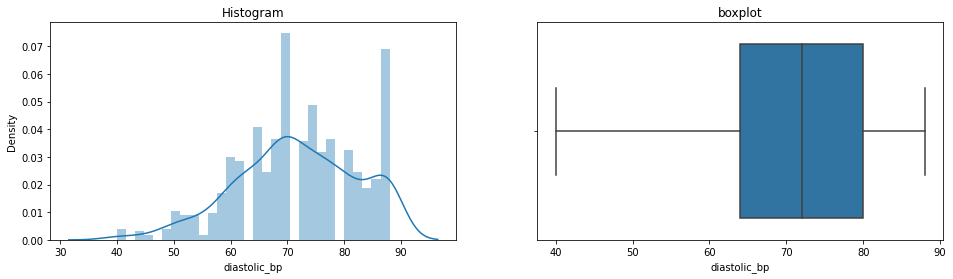

In [75]:
diagnostic_plot(df,'diastolic_bp')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


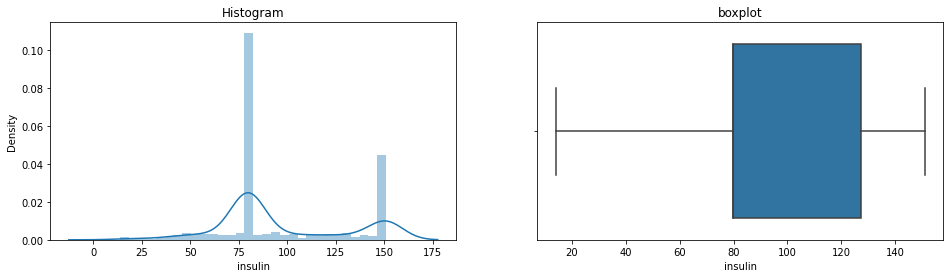

In [76]:
diagnostic_plot(df,'insulin')

**Outlier Capping with IQR**

In [64]:
# Function to find lower and upper limit of an skewed outlier feature
def find_skewed(df,column,distance):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1
    lower_bowndary = q1 - (iqr*distance)
    upper_bowndary = q1 + (iqr*distance)

    return lower_bowndary,upper_bowndary

In [65]:
# find limits for Insulin column
lower_limit, upper_limit =find_skewed(df,'insulin',1.5)
lower_limit, upper_limit
# for extreme region take distance = 3

(8.623697916666671, 150.97526041666669)

In [ ]:
# find limits for diastolic_bp column
lower_limit, upper_limit =find_skewed(df,'diastolic_bp',1.5)
lower_limit, upper_limit

In [71]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

**Capping Outlier**

Below funtion will remove outlier for entire Data Frame

In [73]:
# capping  outlier for entire df in single shot
columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']
for i in columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3-q1
    lower_bowndary = q1 - (iqr * 1.5)
    upper_bowndary = q1 + (iqr * 1.5)
    df[i] = np.where(df[i] > upper_bowndary,upper_bowndary, df[i] )
    df[i] = np.where(df[i] < lower_bowndary,lower_bowndary, df[i] )




In [ ]:
# df.loc[df['Age'] >= 70,'Age'] = 70